<a href="https://colab.research.google.com/github/Azamat2023/Portfolio/blob/main/Loyiha_01_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [2]:
!git clone https://github.com/EscVM/OIDv4_Toolkit.git

Cloning into 'OIDv4_Toolkit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422 (from 1)
Receiving objects: 100% (422/422), 34.08 MiB | 43.19 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
!cd OIDv4_Toolkit && pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9.1
    Uninstalling rsa-4.9.1:
      Successfully uninstalled rsa-4.9.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.


In [4]:
!cd OIDv4_Toolkit && python main.py -h

/content/OIDv4_Toolkit/modules/utils.py:127: SyntaxWarning: invalid escape sequence '\ '
  /  .-.  \ | |    | | `. \ _   __ | |__| |_
/content/OIDv4_Toolkit/modules/utils.py:136: SyntaxWarning: invalid escape sequence '\ '
  (____ \                  | |               | |
/content/OIDv4_Toolkit/modules/utils.py:149: SyntaxWarning: invalid escape sequence '\ '
  \ \/ /| |/___) | | |/ _  | | (___  ) _  )/ ___)
/content/OIDv4_Toolkit/modules/utils.py:159: SyntaxWarning: invalid escape sequence '\ '
  |  __ \                    | |               | |           |_   _| |    | |
/content/OIDv4_Toolkit/modules/show.py:55: SyntaxWarning: invalid escape sequence '\s'
  match_class_name = re.compile('^[a-zA-Z]+(\s+[a-zA-Z]+)*').match(line)
usage: main.py [-h] [--Dataset /path/to/OID/csv/] [-y]
               [--classes list of classes [list of classes ...]]
               [--type_csv 'train' or 'validation' or 'test' or 'all']
               [--sub Subset of human verified images or machine genera

In [5]:
!cd OIDv4_Toolkit && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 64093 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

In [8]:
from fastai.vision.all import *
from ipywidgets import widgets

# path
path = Path('train')
# fls = get_image_files(path) # rasmlarni yuklab olish
# failed = verify_images(path) # failed bo'lgan rasmlarni aniqlash

# datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

# Dataloader
dls = transports.dataloaders(path)

# # datasetni tekshirish
# dls.train.show_batch(max_n = 32, nrows = 4)

# o'qitish (train)
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 61.1MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.234766,0.280742,0.883333,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.403131,0.236315,0.891667,00:07
1,0.315249,0.264829,0.891667,00:08
2,0.230495,0.219996,0.900000,00:07
3,0.175836,0.209111,0.908333,00:08


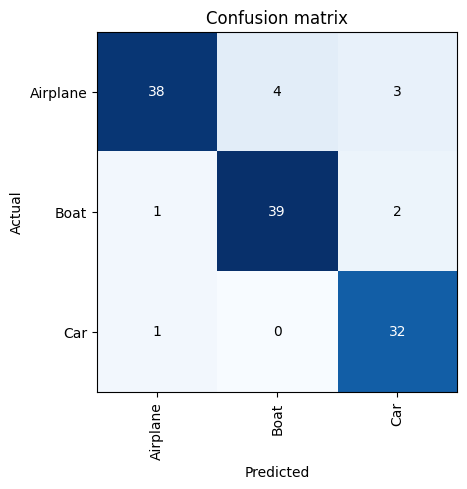

In [9]:
# tekshirish
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

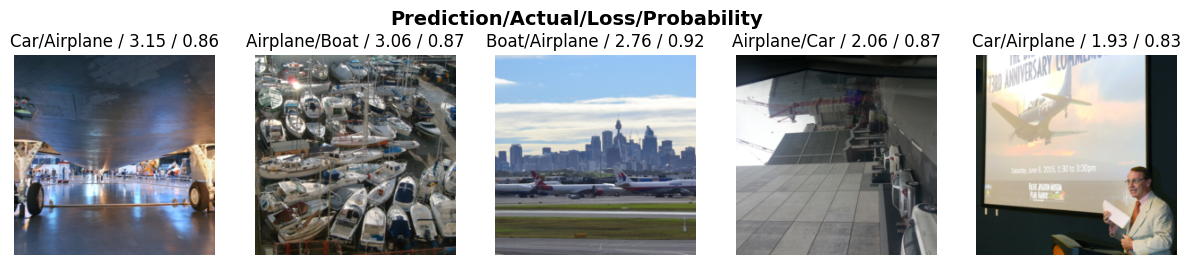

In [10]:
interp.plot_top_losses(5, nrows=1)

In [11]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Airplane; Probability: 100.0%


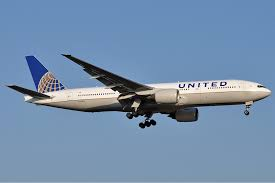

In [15]:
img = PILImage.create(upload.data[-1])
pred, pred_idx, probs = learn.predict(img)
print(f'Prediction: {pred}; Probability: {probs[pred_idx]*100:.1f}%')
img